## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>


## Import Statements


In [2]:
import pandas as pd

## Data Exploration


**Challenge**: Read the .csv file and store it in a Pandas dataframe


In [109]:
stack_overflow_data = pd.read_csv(filepath_or_buffer="QueryResults.csv" ,header=0, names=['DATE', 'TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe


In [64]:
stack_overflow_data.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?


In [25]:
stack_overflow_data.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe


In [65]:
stack_overflow_data.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?


In [85]:
stack_overflow_data.groupby('TAG')['POSTS'].sum()

TAG
assembly        34852
c              336042
c#            1423530
c++            684210
delphi          46212
go              47499
java          1696403
javascript    2056510
perl            65286
php           1361988
python        1496210
r              356799
ruby           214582
swift          273055
Name: POSTS, dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [87]:
stack_overflow_data.groupby(by='TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"


In [98]:
stack_overflow_data.DATE[1]

Timestamp('2008-08-01 00:00:00')

In [97]:
type(stack_overflow_data.DATE[1])

pandas._libs.tslibs.timestamps.Timestamp

In [110]:
print(pd.to_datetime(stack_overflow_data.DATE[1]))
stack_overflow_data.DATE = pd.to_datetime(stack_overflow_data.DATE[1])


2008-08-01 00:00:00


## Data Manipulation


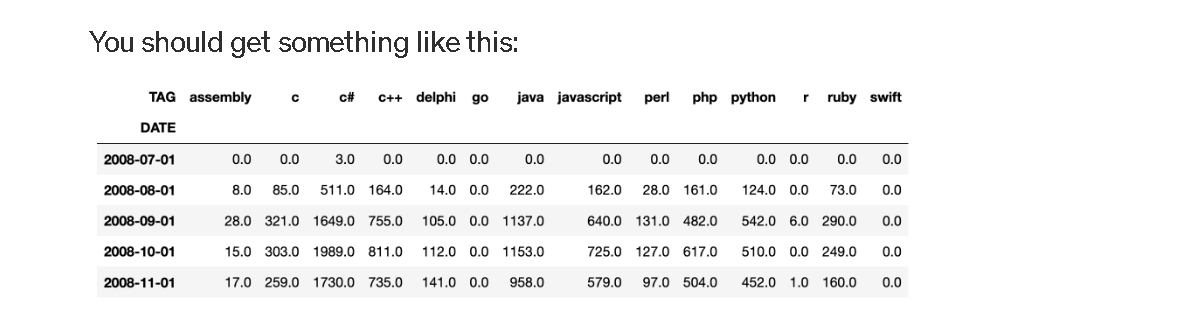


In [112]:

reshaped_df = stack_overflow_data.pivot(index='DATE', columns='TAG', values='POSTS')

ValueError: Index contains duplicate entries, cannot reshape

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.


TAG         assembly       c       c#     c++  delphi     go     java  \
DATE                                                                    
2008-08-01     34852  336042  1423530  684210   46212  47499  1696403   

TAG         javascript   perl      php   python       r    ruby   swift  
DATE                                                                     
2008-08-01     2056510  65286  1361988  1496210  356799  214582  273055  


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.


**Challenge**: Show two line (e.g. for Java and Python) on the same chart.


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).
